<a href="https://colab.research.google.com/github/Hedonstralhoti/Prototipo-Caso-de-uso/blob/main/Estudos_de_caso_USABILIDADE_DE_DATA_SCIENCE_NA_DETEC%C3%87%C3%83O_DE_FRAUDES_EM_COMPRAS_COM_CART%C3%83O_DE_CR%C3%89DITO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importando as bibliotecas necessarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#importando o data base
df = pd.read_csv("http://dl.dropboxusercontent.com/s/xn2a4kzf0zer0xu/acquisition_train.csv?dl=0")

# **Análise Exploratória**

In [ ]:
# identificar o volume de dados do DataFrame
print("Quantidade de linhas:\t "+format(df.shape[0]))
print("Colunas:\t "+format(df.shape[1]))
print("\n\n")

Quantidade de linhas:	 45000
Colunas:	 43





A seguir vamos imprimir as 5 primeiras entradas, isso nos dará uma noção inicial da maneira como os dados foram insiridos no DataFrame.

In [ ]:
# Mostrar as 5 primeiras entradas
df.head()

,ids,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,reason,income,facebook_profile,state,zip,channel,job_name,real_state,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_applied,application_time_in_funnel,email,external_data_provider_credit_checks_last_2_year,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_first_name,external_data_provider_fraud_score,lat_lon,marketing_channel,profile_phone_number,reported_income,shipping_state,shipping_zip_code,profile_tags,user_agent,target_fraud
0,343b7e7b-2cf8-e508-b8fd-0a0285af30aa,False,1Rk8w4Ucd5yR3KcqZzLdow==,IOVu8au3ISbo6+zmfnYwMg==,350.0,101.800832,0.259555,108.427273,0.40,25033.92,36.0,0.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,65014.12,True,sjJbkqJS7cXalHLBFA+EOQ==,Ernn+uVXCMq/6ARrBCcd+A==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,NaN,0.0,0.0,18.0,18.0,07:52:34,444,outlook.com,NaN,2,0.0,51.0,leidelaura,645,"(-29.151545708122246, -51.1386461804385)",Invite-email,514-9840782,57849.0,BR-MT,17528,"{'tags': ['n19', 'n8']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN
1,bc2c7502-bbad-0f8c-39c3-94e881967124,False,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,370.0,97.062615,0.942655,92.002546,0.24,NaN,NaN,39726.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,100018.91,False,xsd3ZdsI3356I3xMxZeiqQ==,rlWIXTBO+VOa34+SpGyhlQ==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,50.0,0.0,0.0,14.0,14.0,02:34:29,346,gmail.com,0.0,1,0.0,17.0,diocezio,243,"(-19.687710705798963, -47.94151536525154)",Radio-commercial,251-3659293,4902.0,BR-RS,40933,"{'tags': ['n6', 'n7', 'nim']}",Mozilla/5.0 (Linux; Android 5.0.2; SAMSUNG SM-...,NaN
2,669630dd-2e6a-0396-84bf-455e5009c922,True,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,360.0,100.027073,0.351918,112.892453,0.29,7207.92,36.0,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,65023.65,NaN,Ygq6MsM98oC8yceExr69Ig==,PjTIDfJsK0DKL9fO7vuW2g==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,NaN,0.0,0.0,10.0,NaN,00:60:02,6,gmail.com,NaN,2,NaN,9.0,veralucia,65,"(-28.748023890412284, -51.867279334353995)",Waiting-list,230-6097993,163679.0,BR-RR,50985,"{'tags': ['n0', 'n17', 'nim', 'da']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN
3,d235609e-b6cb-0ccc-a329-d4f12e7ebdc1,False,1Rk8w4Ucd5yR3KcqZzLdow==,dCm9hFKfdRm7ej3jW+gyxw==,510.0,101.599485,0.987673,94.902491,0.32,NaN,NaN,54591.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,68830.01,False,KET/Pmr6rHp1RJ/P9ymztw==,Cc/kWDLQH3dpHv5HU+pLVA==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiE56f...,n+xK9CfX0bCn77lClTWviw==,NaN,1.0,0.0,19.0,19.0,11:20:49,406,spgov.com,NaN,3,NaN,38.0,venice,815,"(-17.520650158450454, -39.75801139933186)",Waiting-list,261-3543751,1086.0,BR-RN,37825,{'tags': ['n4']},Mozilla/5.0 (Linux; Android 6.0; HTC One X10 B...,NaN
4,9e0eb880-e8f4-3faa-67d8-f5cdd2b3932b,False,8k8UDR4Yx0qasAjkGrUZLw==,+CxEO4w7jv3QPI/BQbyqAA==,500.0,98.474289,0.532539,118.126207,0.18,NaN,NaN,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,60011.29,True,xsd3ZdsI3356I3xMxZeiqQ==,i036nmJ7rfxo+3EvCD7Jnw==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,NaN,0.0,0.0,11.0,NaN,13:39:03,240,gmail.com,0.0,2,1.0,46.0,darzisa,320,"(-16.574259446978008, -39.90990074785962)",Invite-email,102-3660162,198618.0,BR-MT,52827,"{'tags': ['pro+aty', 'n19', 'da', 'b19']}",Mozilla/5.0 (Linux; Android 7.0; Pixel C Build...,NaN


A partir dos dados das 5 primeiras linhas, podemos tirar as seguintes conclusões:


*   Algumas colunas `ids`,`score_1`,`score_2`,`reason`,`state`,`zip`,`channel`,`job_name`,`real_state`, possuem algum tipo de criptografia, provavelmente para ocultar algum dado pessoal do cliente.
*   `target_default` é nosso target, ou seja, é a variavel alvo do nosso modelo.
*   Foi possível notar que algumas colunas possuem entradas "NaN", isso significa que esse dado é nulo, devemos analisar essas colunas e tratar esses dados de maneira conveniente.
*   A coluna `lat_lon` além de estar no formato string, não está normalizada, devemos analisar essa situação e se for preciso tratar esses dados.






## Dicionário de dados

`ids` - id do cliente <br>
`target_default` - variável que indica se o cliente entrou em `default`ou não<br>
`score_1` - score de classíficação do cliente<br>
`score_2` - score de classificação do cliente<br>
`score_3` - score de classificação do cliente<br>
`score_4` - score de classificação do cliente<br>
`score_5` - score de classificação do cliente<br>
`score_6` - score de classificação do cliente<br>
`risk_rate` - taxa de risco<br>
`last_amount_borrowed` - último valor emprestado<br>
`last_borrowed_in_months` - quantidade de meses desde o último empréstimo<br>
`credit_limit` - limite de crédito<br>
`reason` - Razão<br>
`income` - Renda <br>
`facebook_profile` - possui facebook ou não<br>
`state` - Estado<br>
`zip` - CEP<br>
`channel` - canal de contato<br>
`job_name` - Profissão<br>
`real_state` - valor criptografado <br>
`ok_since` - OK desde <br>
`n_bankruptcies` - Quebra de contrato<br>
`n_defaulted_loans` - Empréstimos inadimplentes<br>
`n_accounts` - Quantidade de contas<br>
`n_issues` - Quantidade de emissões<br>
`application_time_applied` - Tempo de aplicação aplicado (tradução literal)<br>
`application_time_in_funnel` - Tempo de aplicação no funil (tradução literal)<br>
`email` - Provedor de E-mail<br>
`external_data_provider_credit_checks_last_2_year` - Verificações de crédito nos últimos 2 anos<br>
`external_data_provider_credit_checks_last_month` - Verificações de crédito no último mes<br>
`external_data_provider_credit_checks_last_year` - Verificações de crédito no último ano<br>
`external_data_provider_email_seen_before` - email do provedor de dados externo visto antes (tradução literal)<br>
`external_data_provider_first_name` - Primeiro nome no provedor<br>
`external_data_provider_fraud_score` - pontuação de fraude do provedor de dados externo (tradução literal)<br>
`lat_lon` - Latitude e Longitude de localização<br>
`marketing_channel` - Canal de contato<br>
`profile_phone_number` - Número de telefone<br>
`reported_income` - Salário informado<br>
`shipping_state` - Estado de compra<br>
`shipping_zip_code` - CEP da compra<br>
`profile_tags` - Tags<br>
`user_agent` - Navegador utilizado<br>
`target_fraud` - variável `target`para indicação de fraude<br>

A seguir vamos imprimir os dados estatísticos do DataFrame, fazendo isso podemos 
analisar a possibilidade de existir anomalias ou inconsistencias, nos dados salvos.

In [ ]:
#Imprimir os dados estatísticos do DataFrame
df.describe()

,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,income,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_in_funnel,external_data_provider_credit_checks_last_2_year,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_fraud_score,reported_income,shipping_zip_code
count,44438.000000,45000.000000,45000.000000,45000.000000,44438.000000,15044.000000,15044.000000,31200.000000,4.443800e+04,18455.000000,44303.000000,44426.000000,44438.000000,33456.000000,45000.000000,22372.0,45000.000000,29876.000000,42767.000000,45000.000000,45000.00,45000.000000
mean,347.983258,100.006797,0.500037,99.925228,0.296717,13782.341991,41.763893,34381.951154,7.160739e+04,35.069737,0.076270,0.004569,10.696701,11.068119,247.537000,0.0,1.501067,0.503381,12.534781,500.399800,inf,33923.514844
std,110.429165,3.178080,0.288326,10.016549,0.101933,8077.571933,10.252705,36586.982218,5.185897e+04,21.663194,0.274052,0.079400,4.592463,4.595501,146.118398,0.0,1.114941,0.499997,126.530487,287.968873,NaN,12692.406382
min,0.000000,86.191572,0.000035,60.663039,0.000000,1005.180000,36.000000,0.000000,4.821180e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,-999.000000,0.000000,403.00,12001.000000
25%,270.000000,97.867036,0.252150,93.198353,0.220000,7519.502500,36.000000,10000.000000,4.501078e+04,17.000000,0.000000,0.000000,7.000000,8.000000,120.000000,0.0,1.000000,0.000000,11.000000,252.000000,50948.25,22937.000000
50%,340.000000,100.018900,0.500753,99.974796,0.290000,12023.465000,36.000000,25647.000000,6.126676e+04,32.000000,0.000000,0.000000,10.000000,10.000000,248.000000,0.0,2.000000,1.000000,27.000000,503.000000,101779.00,33896.000000
75%,420.000000,102.141797,0.748816,106.640275,0.360000,19220.270000,36.000000,47086.750000,8.601923e+04,50.000000,0.000000,0.000000,13.000000,14.000000,375.000000,0.0,2.000000,1.000000,43.000000,747.000000,151337.25,44910.000000
max,990.000000,113.978234,0.999973,142.192400,0.900000,35059.600000,60.000000,448269.000000,5.000028e+06,141.000000,5.000000,5.000000,49.000000,49.000000,500.000000,0.0,3.000000,1.000000,59.000000,1000.000000,inf,56000.000000


Observando os dados do resumo das principais informações estatísticas podemos  destacar algumas observações:


*   Algumas colunas possuem o desvio padrão muito alto, então existe a possibilidade de haver outliers em nosso DataFrame, devemos obeservar essas situações e se for necessário tratar esses dados.
*   A coluna `external_data_provider_email_seen_before` possui pelo menos um dado com valor negativo, esses dados devem ser tratados logo mais.
*   A coluna `reported_income` apresenta valores *inf*, que irão interferir na análise e modelo. Substituiremos valores do tipo `np.inf` por `np.nan` para trabalhar com os dados.
<br>
<br>
<br>
<br>


Posteriormente vamos  imprimir os tipos de variáveis que compõem o DataFrame, assim poderemos estabelecer a divisão entre as variáveis numéricas e as variáveis qualitativas.


In [ ]:
#Imprimir tipos de variáveis
print('Tipos de Variáveis:')
print(df.dtypes)

Tipos de Variáveis:
ids                                                  object
target_default                                       object
score_1                                              object
score_2                                              object
score_3                                             float64
score_4                                             float64
score_5                                             float64
score_6                                             float64
risk_rate                                           float64
last_amount_borrowed                                float64
last_borrowed_in_months                             float64
credit_limit                                        float64
reason                                               object
income                                              float64
facebook_profile                                     object
state                                                object
zip                 

Temos :<br>
21 variáveis não numéricas<br>
22 variáveis numéricas

Como vimos anteriormente, existem colunas com dados NaN(valor nulo), vamos agora imprimir a porcentagem de valores nulos em cada coluna.

In [ ]:
#imprimir a porcentagem de valores ausentes
print('\nValores Ausentes:')
print((df.isnull().sum() / df.shape[0]).sort_values(ascending=False))


Valores Ausentes:
target_fraud                                        0.966178
last_amount_borrowed                                0.665689
last_borrowed_in_months                             0.665689
ok_since                                            0.589889
external_data_provider_credit_checks_last_2_year    0.502844
external_data_provider_credit_checks_last_year      0.336089
credit_limit                                        0.306667
n_issues                                            0.256533
facebook_profile                                    0.099067
marketing_channel                                   0.079511
job_name                                            0.074133
target_default                                      0.072422
external_data_provider_email_seen_before            0.049622
lat_lon                                             0.030289
user_agent                                          0.016044
n_bankruptcies                                      0.015489
n_def

Observando a porcentagem de valores nulos é possivel destacar algumas observações:


* Colunas como `target_fraud`, `last_amount_borrowed`, `last_borrowed_in_months`, `ok_since`, `external_data_provider_credit_checks_last_2_year`, apresentam mais de 50% de valores nulos.                                      
* Colunas como `external_data_provider_credit_checks_last_year`, `credit_limit` e `n_issues`, apresentam mais de 20% de valores nulos.
* A coluna `target_fraud`, possui 96% dos valores nulos, sendo assim a coluna com mais valores nulos, essa coluna não deverá ser usada em nosso modelo, portanto deve ser excluida. 




A seguir vamos imprimir o número de entradas com valores diferentes que as colunas possuem:

In [ ]:
#imprimir os valores únicos
print("\nValores Únicos:")
print(df.nunique().sort_values())


Valores Únicos:
external_data_provider_credit_checks_last_2_year        1
channel                                                 1
target_fraud                                            2
target_default                                          2
external_data_provider_credit_checks_last_year          2
facebook_profile                                        2
last_borrowed_in_months                                 2
external_data_provider_credit_checks_last_month         4
n_defaulted_loans                                       5
real_state                                              5
email                                                   6
n_bankruptcies                                          6
score_1                                                 7
marketing_channel                                       9
shipping_state                                         25
score_2                                                35
n_issues                                               

Observando o número de entradas com valores diferentes que as colunas possuem é possivel destacar que existem duas colunas com valores unicos `external_data_provider_credit_checks_last_2_year` e `channel`. Essas colunas não acrescentam nenhum valor a nosso modelo, portanto futuramente vamos exclui-las.


In [ ]:
# Criar uma matriz de correlação
df_cor = df.copy()
corr = df_cor.corr()
display(corr)



,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,income,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_in_funnel,external_data_provider_credit_checks_last_2_year,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_fraud_score,reported_income,shipping_zip_code
score_3,1.000000,-0.001661,0.004045,0.000049,0.048169,0.041729,0.057122,0.228040,-0.111461,0.022286,-0.029837,-0.011724,0.195366,0.187109,0.003777,NaN,0.000674,0.006650,0.000668,0.001408,0.000828,0.007744
score_4,-0.001661,1.000000,0.007339,0.003102,-0.008492,0.002822,0.002857,0.002710,-0.001561,0.015873,-0.006935,-0.004115,-0.009515,-0.008696,0.002039,NaN,0.005070,0.011416,-0.006425,-0.001931,0.008846,-0.003782
score_5,0.004045,0.007339,1.000000,0.002762,0.002004,-0.002081,0.002284,0.006207,-0.004644,-0.000097,0.004173,-0.002352,0.005643,0.004016,0.006492,NaN,0.001567,0.000825,-0.008178,-0.002996,-0.003623,0.007760
score_6,0.000049,0.003102,0.002762,1.000000,0.003862,0.013898,-0.000598,0.009508,0.012738,-0.008076,0.006187,0.007400,-0.002802,-0.003580,0.000352,NaN,0.005422,-0.007745,0.005419,-0.000253,0.003978,-0.000802
risk_rate,0.048169,-0.008492,0.002004,0.003862,1.000000,0.087659,0.183118,0.001590,0.005814,-0.039037,0.030541,0.012307,0.021287,0.001669,-0.001723,NaN,0.001982,0.003995,0.003162,-0.001107,-0.002757,-0.008277
last_amount_borrowed,0.041729,0.002822,-0.002081,0.013898,0.087659,1.000000,0.417034,0.201812,0.398043,-0.039979,-0.066822,0.001279,0.203504,0.193334,-0.008107,NaN,0.002276,-0.009752,0.005745,0.018575,0.006202,0.006853
last_borrowed_in_months,0.057122,0.002857,0.002284,-0.000598,0.183118,0.417034,1.000000,0.107560,0.100816,-0.035898,-0.012839,0.002363,0.064585,0.083930,0.002613,NaN,-0.003538,-0.011964,0.002065,-0.009775,0.008719,-0.007511
credit_limit,0.228040,0.002710,0.006207,0.009508,0.001590,0.201812,0.107560,1.000000,0.304219,-0.046420,-0.040697,0.007340,0.371503,0.370119,0.002602,NaN,0.002639,-0.006034,0.008328,0.007080,-0.002972,-0.006169
income,-0.111461,-0.001561,-0.004644,0.012738,0.005814,0.398043,0.100816,0.304219,1.000000,-0.056407,-0.044007,0.013689,0.167079,0.152970,-0.006318,NaN,-0.001675,0.002302,0.006072,0.000325,0.003895,-0.004034
ok_since,0.022286,0.015873,-0.000097,-0.008076,-0.039037,-0.039979,-0.035898,-0.046420,-0.056407,1.000000,0.069224,-0.093741,-0.021407,-0.030727,-0.015634,NaN,0.000226,0.005779,0.003404,0.014236,-0.000907,0.008680


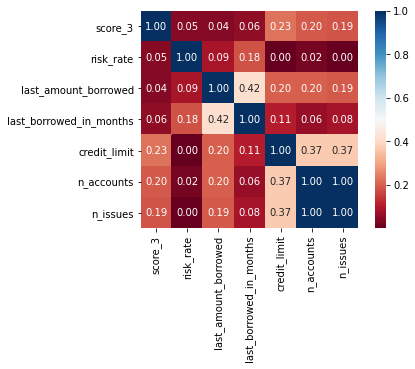

In [ ]:
# Plotando gráfico de correlação
df_corr = df.copy()
corr = df_corr[['score_3', 'risk_rate','last_amount_borrowed', 'last_borrowed_in_months','credit_limit', 'n_accounts', 'n_issues']].corr()
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

Agora vamos plotar um grafico para analisar se existe um equilibrio na proporção entre os inadimplentes e os não inadimplentes. É muito importante, para o nosso modelo, que haja um equilibrio entre esses números.

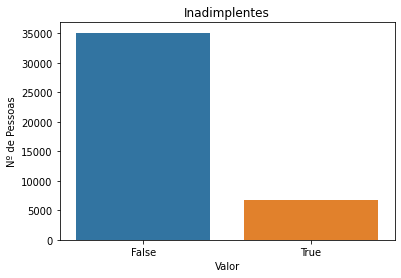

Proporção entre Inadimplentes no Dataset:
False    77.955556
True     14.802222
Name: target_default, dtype: float64


In [ ]:
#Plotando gráfico de proporção entre Inadimplentes 
fig, ax = plt.subplots()
sns.countplot('target_default', data=df, ax=ax)
ax.set_title("Inadimplentes")
ax.set_xlabel("Valor")
ax.set_ylabel("Nº de Pessoas")
plt.show()

print("Proporção entre Inadimplentes no Dataset:")
print((df['target_default'].value_counts() / df.shape[0] ) *100)

In [ ]:
df_inat = df.copy()
df_inat = df
df_ina = df.copy()

É possivel notar uma grande discrepancia entre valores de pessoas que são e não são inadimplentes, o ideal nesse tipo de situação é que haja um equilibrio, portanto vamos ter que tratar essa diferença.

# **Preparação dos Dados**
Agora que já fizemos uma analise dos dados, vamos prosseguir com a limpeza e preparação dos dados

In [ ]:
df_clean = df.copy()
# Substituir inf por NaN na coluna reported_income
df_clean['reported_income'] = df_clean['reported_income'].replace(np.inf, np.nan)

# Excluir as colunas ids, target_fraud, external_data_provider_credit_checks_last_2_year e channel
df_clean.drop(labels=['ids', 'target_fraud',
                      'external_data_provider_credit_checks_last_2_year',
                      'channel'], axis=1, inplace=True)
# Substituir o dado -999 por NaN, na coluna external_data_provider_email_seen_before 
df_clean.loc[df_clean['external_data_provider_email_seen_before'] == -999.0, 'external_data_provider_email_seen_before'] = np.nan

# Eliminar colunas sem informações(algumas dessas informações tem a necessidade de ser confirmada dentro da empresa)
drop_var = ['reason', 'zip', 'job_name', 'external_data_provider_first_name',
            'lat_lon', 'shipping_zip_code', 'user_agent', 'profile_tags',
            'application_time_applied', 'email', 'marketing_channel',
            'profile_phone_number', 'shipping_state']
df_clean.drop(labels=drop_var, axis=1, inplace = True)

# Eliminar as entradas onde o target_default é NaN
df_clean.dropna(subset=['target_default'], inplace= True)

É normal um DataSet apresentar dados nulos, nem todos os campos de um cadastro são obrigatorios. Nesse nosso caso não é diferente muitos dados estão nulos, pois, provavelmente não são obrigatorios, um exemplo é a coluna `facebook_profile` que se refere a informação se o cliente possui ou não facebook. Outra justificativa para os dados nulos, são os dados ainda não existem, este pode ser o caso por exemplo da coluna `last_amount_borrowed` que é o valor do ultimo emprestimo do usuário, que existe a possibilidade desse usuario nunca tem feito um emprestimo antes, portanto esse dado ainda não existe. 
<br>
Independente do motivo temos que tratar esses dados nulos. Para isso vamos assumir que: 

*   Para as colunas em que os dados ainda não existam, vamos substituir NaN por 0.
*   Para as colunas numéricas, vamos substituir NaN pela mediana.
*   Para as colunas categóricas, vamos substituir NaN pelo valor mais frequente.



In [ ]:
from sklearn.impute import SimpleImputer

num_df = df_clean.select_dtypes(exclude='object').columns
cat_df = df_clean.select_dtypes(include='object').columns

# Substituir os valores ausentes
df_clean.last_amount_borrowed.fillna(value = 0, inplace = True)
df_clean.last_borrowed_in_months.fillna(value = 0, inplace = True)
df_clean.n_issues.fillna(value = 0, inplace = True)

# Substituir NaN pela mediana nas variáveis numéricas
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer = imputer.fit(df_clean.loc[:,num_df])
df_clean.loc[:,num_df] = imputer.transform(df_clean.loc[:,num_df])

# Substituir NaN pela maior frequencia nas variáveis categóricas
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer = imputer.fit(df_clean.loc[:,cat_df])
df_clean.loc[:,cat_df] = imputer.transform(df_clean.loc[:,cat_df])

Agora vamos verificar se o DataFrame ainda possui valores nulos.

In [ ]:
# verificando a quantidade de dados nulos
df_clean.isnull().sum()

target_default                                     0
score_1                                            0
score_2                                            0
score_3                                            0
score_4                                            0
score_5                                            0
score_6                                            0
risk_rate                                          0
last_amount_borrowed                               0
last_borrowed_in_months                            0
credit_limit                                       0
income                                             0
facebook_profile                                   0
state                                              0
real_state                                         0
ok_since                                           0
n_bankruptcies                                     0
n_defaulted_loans                                  0
n_accounts                                    

Com um objetivo de melhorar o desempenho do nosso modelo, vamos normalizar as variáveis numéricas usando ´StandardScaler´

In [ ]:
from sklearn.preprocessing import StandardScaler

scaled_df = df_clean.copy()
# normalizar as colunas numéricas
num_cols = scaled_df.drop('target_default', axis=1).select_dtypes(exclude='object').columns

scaled_df[num_cols] = StandardScaler().fit_transform(scaled_df[num_cols].values)

Explicativo sobre labels

In [ ]:
from sklearn.preprocessing import LabelEncoder 

encoded_df = scaled_df.copy()
# extrair as colunas categóricas
cat_cols = encoded_df.select_dtypes('object').columns

# codificar cada coluna categórica
for col in cat_cols:
  encoded_df[col+'_encoded'] = LabelEncoder().fit_transform(encoded_df[col])
  encoded_df.drop(col, axis=1, inplace=True)

Separa a variavel alvo e divide o data set entre treino e teste

In [ ]:
from sklearn.model_selection import train_test_split

# separar as variáveis independentes do nosso target
X = encoded_df.drop('target_default', axis=1).select_dtypes(exclude='object')
y = encoded_df['target_default']

# dividir o dataset entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


True     4595
False    4595
dtype: int64


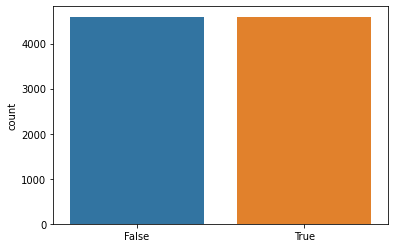

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
# usar técnica under-sampling
rus = RandomUnderSampler()
X_res, y_res = rus.fit_sample(X_train, y_train)

# ver o balanceamento das classes
print(pd.Series(y_res).value_counts())

# plotar a nova distribuição de classes
sns.countplot(y_res);

In [ ]:
X_res, X_test, y_res, y_test = train_test_split(X, y, test_size=0.3)

# **Construção do Modelo**

In [ ]:
#from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

reg = LogisticRegression(C= 0.08 )

reg.fit(X_res, y_res)
# instanciando o modelo e treinando o mesmo
#ml_model = XGBClassifier(learning_rate=0.01, n_estimators=1000,
                         #max_depth=3, subsample = 0.9,
                         #colsample_bytree = 0.1, gamma=1,
                         #random_state=42)
#ml_model.fit(X_res, y_res)
print ('Score for Logistic Regression:')
print (reg.score(X_res, y_res), '\n')


Score for Logistic Regression:
0.8387980012321172 



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
# previsões e probabilidades em cima do dataset de teste
y_pred = ml_model.predict(X_test)

# ver performance do algoritmo
print("\nAccuracy Score:")
print (accuracy_score(y_test, y_pred))

NameError: ignored

In [ ]:
from sklearn.metrics import confusion_matrix
# plotar a matrix de confusão
#skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)
print (pd.crosstab(y_test, ml_model.predict(X_test), rownames=['Real'], colnames=['Predição'], margins=True))